## Create plots for BLEU and ROUGE

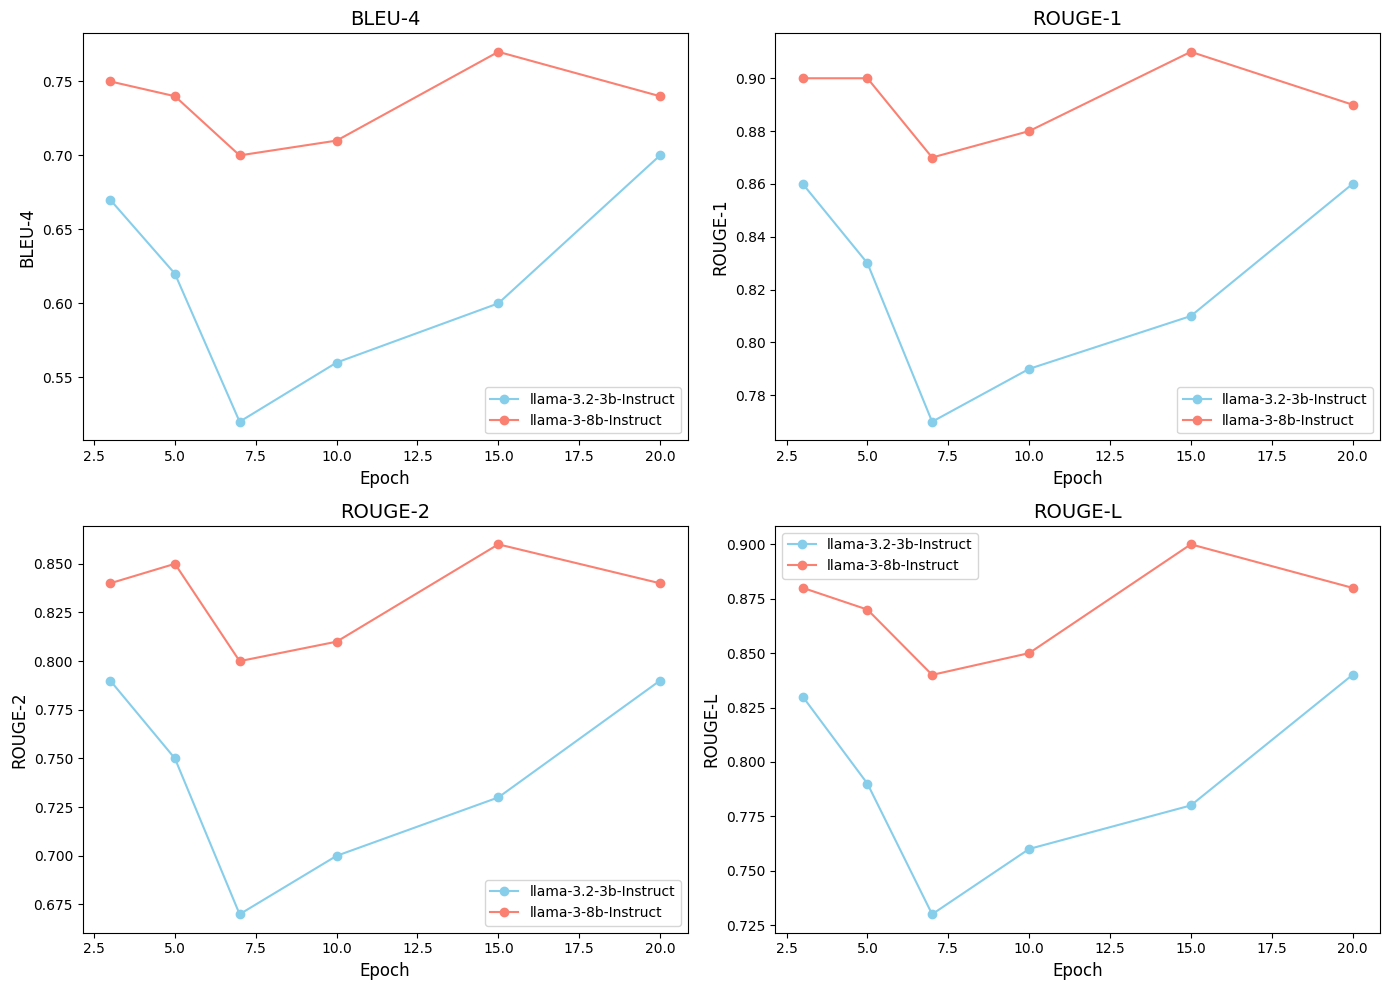

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# 构造数据
data = {
    "Model": [
        "llama-3.2-3b-Instruct"] * 6 +
        ["llama-3-8b-Instruct"] * 6,
    "Epoch": [3, 5, 7, 10, 15, 20] * 2,
    "BLEU-4": [0.67, 0.62, 0.52, 0.56, 0.60, 0.70, 0.75, 0.74, 0.70, 0.71, 0.77, 0.74],
    "ROUGE-1": [0.86, 0.83, 0.77, 0.79, 0.81, 0.86, 0.90, 0.90, 0.87, 0.88, 0.91, 0.89],
    "ROUGE-2": [0.79, 0.75, 0.67, 0.70, 0.73, 0.79, 0.84, 0.85, 0.80, 0.81, 0.86, 0.84],
    "ROUGE-L": [0.83, 0.79, 0.73, 0.76, 0.78, 0.84, 0.88, 0.87, 0.84, 0.85, 0.90, 0.88],
}

# 创建DataFrame
df = pd.DataFrame(data)

# 设置颜色
colors = {
    "llama-3.2-3b-Instruct": "skyblue",
    "llama-3-8b-Instruct": "salmon"
}

# 准备图表
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["BLEU-4", "ROUGE-1", "ROUGE-2", "ROUGE-L"]

# 绘图
for ax, metric in zip(axs.flat, metrics):
    for model in df["Model"].unique():
        subset = df[df["Model"] == model]
        ax.plot(
            subset["Epoch"],
            subset[metric],
            label=model,
            marker='o',
            color=colors[model]
        )
    ax.set_title(metric, fontsize=14)
    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.legend()

plt.tight_layout()
plt.show()


## Create plot for best-epoch performance on BLEU and ROUGE

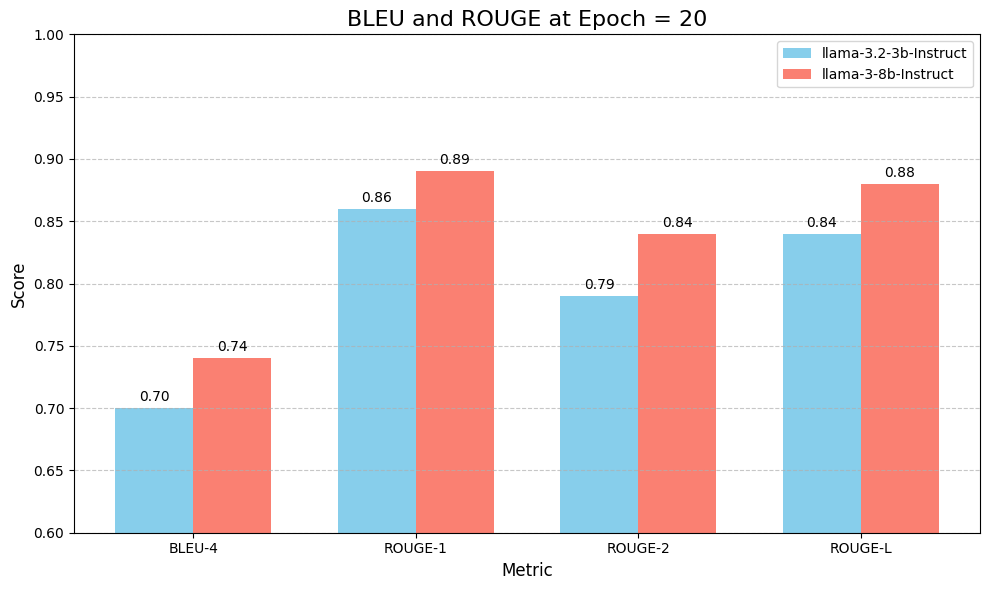

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 构造 epoch=20 的数据
data_20 = {
    "Metric": ["BLEU-4", "ROUGE-1", "ROUGE-2", "ROUGE-L"],
    "llama-3.2-3b-Instruct": [0.70, 0.86, 0.79, 0.84],
    "llama-3-8b-Instruct": [0.74, 0.89, 0.84, 0.88],
}

df = pd.DataFrame(data_20)

# 设置位置
metrics = df["Metric"]
x = np.arange(len(metrics))  # 4个指标的位置
width = 0.35  # 每个柱子的宽度

# 创建图形
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制柱子
bar1 = ax.bar(x - width/2, df["llama-3.2-3b-Instruct"], width, label='llama-3.2-3b-Instruct', color='skyblue')
bar2 = ax.bar(x + width/2, df["llama-3-8b-Instruct"], width, label='llama-3-8b-Instruct', color='salmon')

# 添加标签和标题
ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('BLEU and ROUGE at Epoch = 20', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0.6, 1.0)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# 在柱子上标出数值
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# 保存图片
plt.tight_layout()
plt.savefig("bleu_rouge_epoch20_bar.png", dpi=300)
plt.show()


## Creat plot for EM

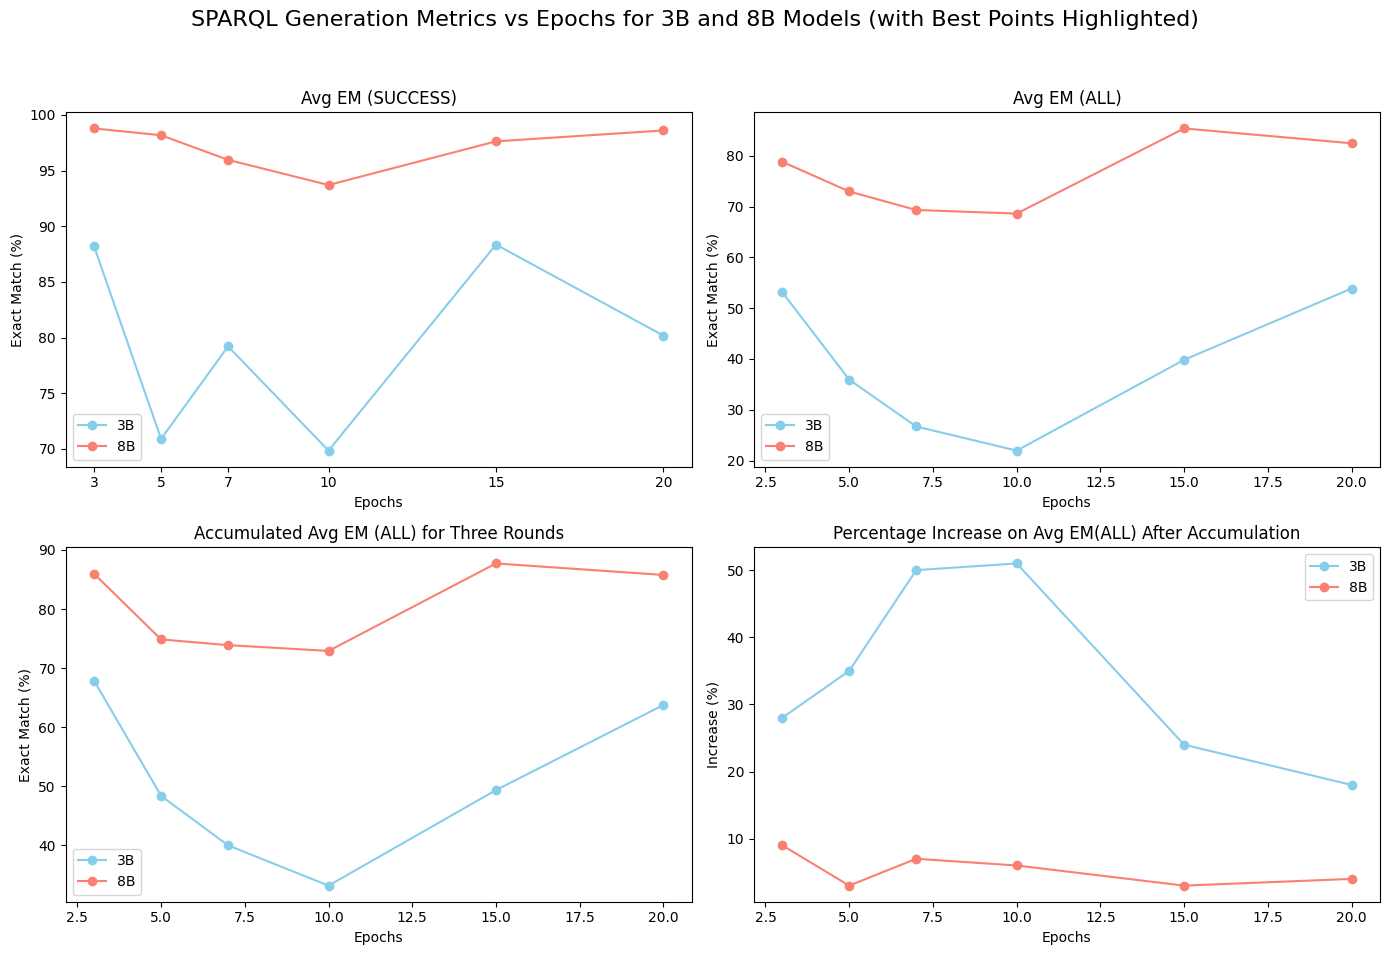

In [12]:
import matplotlib.pyplot as plt

# 数据定义
epochs = [3, 5, 7, 10, 15, 20]

# Avg EM (SUCCESS)
em_success_3b = [88.18, 70.90, 79.21, 69.85, 88.35, 80.18]
em_success_8b = [98.78, 98.17, 95.96, 93.70, 97.62, 98.60]

# Avg EM (ALL)
em_all_3b = [53.15, 35.93, 26.71, 21.96, 39.83, 53.87]
em_all_8b = [78.82, 72.97, 69.33, 68.62, 85.38, 82.46]

# Accumulated Avg EM (ALL)
acc_em_3b = [67.84, 48.34, 39.96, 33.14, 49.32, 63.74]
acc_em_8b = [85.96, 74.85, 73.88, 72.90, 87.72, 85.77]

# Increase %
increase_3b = [28, 35, 50, 51, 24, 18]
increase_8b = [9, 3, 7, 6, 3, 4]

# 绘图
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("SPARQL Generation Metrics vs Epochs for 3B and 8B Models (with Best Points Highlighted)", fontsize=16)

# 1. Avg EM (SUCCESS)
axs[0, 0].plot(epochs, em_success_3b, label="3B", marker='o', color='skyblue')
axs[0, 0].plot(epochs, em_success_8b, label="8B", marker='o', color='salmon')
axs[0, 0].set_title("Avg EM (SUCCESS)")
axs[0, 0].set_ylabel("Exact Match (%)")
axs[0, 0].set_xlabel("Epochs")
axs[0, 0].set_xticks(epochs)
axs[0, 0].legend()


# 2. Avg EM (ALL)
axs[0, 1].plot(epochs, em_all_3b, label="3B", marker='o', color='skyblue')
axs[0, 1].plot(epochs, em_all_8b, label="8B", marker='o', color='salmon')
axs[0, 1].set_title("Avg EM (ALL)")
axs[0, 1].set_ylabel("Exact Match (%)")
axs[0, 1].set_xlabel("Epochs")
axs[0, 1].legend()


# 3. Accumulated Avg EM (ALL)
axs[1, 0].plot(epochs, acc_em_3b, label="3B", marker='o', color='skyblue')
axs[1, 0].plot(epochs, acc_em_8b, label="8B", marker='o', color='salmon')
axs[1, 0].set_title("Accumulated Avg EM (ALL) for Three Rounds")
axs[1, 0].set_ylabel("Exact Match (%)")
axs[1, 0].set_xlabel("Epochs")
axs[1, 0].legend()


# 4. Increase %
axs[1, 1].plot(epochs, increase_3b, label="3B", marker='o', color='skyblue')
axs[1, 1].plot(epochs, increase_8b, label="8B", marker='o', color='salmon')
axs[1, 1].set_title("Percentage Increase on Avg EM(ALL) After Accumulation")
axs[1, 1].set_ylabel("Increase (%)")
axs[1, 1].set_xlabel("Epochs")
axs[1, 1].legend()


# 布局优化
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("em.png", dpi=300)
plt.show()
